# Shot overview

In [65]:
%matplotlib notebook
from IPython.core.display import display, HTML
import ipfnpytools.aug_read as aug_read
from ipfnpytools.plot import plot_signals
from ipfnpytools.save_figure import save_figure
import numpy as np
import pandas as pd
from collections import namedtuple
import matplotlib.pyplot as plt

def valid(x):
    return True if x is not None and np.isfinite(x) else False

## Parameters

Change the parameters in the next cell to suit your needs

### Choosing the signals

To add signals you must create an new row following the suggested structure. You must fill-in every parameter:
* **diagnostic:** three-letter shotfile identifier
* **name:** signal identifier within the shotfile
* **scale:** scale factor, e.g., 1e6
* **y_min / y_max:** lower and upper limits for the plot. Choose `None` to enable auto range.
* **box:** specify in which box to draw the signal
* **y_label:** label to put on the yy axis. Supports latex syntax, e.g., D-\\$\alpha\\$ => D-$\alpha$ 
* **line_width:** line width for the signal. Should be small (<1) for signals with fast fluctuations.

To remove signals, simply comment the corresponding line with a `#`. To comment/uncomment multiple lines simultaneously, select the lines and press `Ctrl`+`~`

In [105]:
shot = 37752

t_begins = 0 # Begin at time t_begins
t_ends = None # End at time t_ends

figure_size = (12, 9)  # Figure size in inches (width, height)

signals = pd.DataFrame(
    
columns=
['diagnostic', 'name', 'scale', 'y_min', 'y_max', 'box', 'y_label', 'line_width'],
    
data=[                          
['MAG', 'Ipa'     ,  1e6, None, None, 0,                             "$10^6$", 1.5],
['NIS', 'PNI'     ,  1e6, None, None, 0,                             "$10^6$", 1.5],
['ECS', 'PECRH'   ,  1e6, None, None, 0,                             "$10^6$", 1.5],
['DCN', 'H-1'     , 1e19, None, None, 1, "$\overline{n_e}$ ($10^{19}/m^{3})$", 1],
['DCN', 'H-5'     , 1e19, None, None, 1, "$\overline{n_e}$ ($10^{19}/m^{3})$", 1],
# ['FPG', 'delRoben',    1, None, None, 0,                                   "", 1],
# ['TOT', 'Wmhd'    ,  1e6, None, None, 2,                     "$W_{mhd}$ (MJ)", 1],
# ['FPC', 'IpiFP'   ,  1e6, None, None, 3,                       "$I_{p}$ (MA)", 1],
# ['POT', 'ELMa-Han',    1, None, None, 4,                 r"$D_\alpha$ (a.u.)", 1],
# ['POT', 'ELMi-Han',    1, None, None, 4,                 r"$D_\alpha$ (a.u.)", 1],
# ['TOT', 'P_OH'    ,  1e6, None, None, 5,                             "P (MW)", 1],
# ['ECS', 'PECRH'   ,  1e6, None, None, 5,                             "P (MW)", 1],
# ['BPD', 'Pradtot' ,  1e6, None, None, 5,                             "P (MW)", 1],
['MAC', 'Ipolsola',  1e3,  -25, 25, 3,                     "$I_{div}$ (kA)", 0.1],
['MAC', 'Ipolsoli',  1e3,  -25, 25, 3,                     "$I_{div}$ (kA)", 0.1],
['UVS', 'D_tot'   , 1e21, None, None, 2,                 "Fuel ($10^{21}$/s)", 2],
['UVS', 'N_tot'   , 1e21, None, None, 2,                 "Fuel ($10^{21}$/s)", 2],
['UVS', 'CFDu13B' , 1e21, None, None, 2,                 "Fuel ($10^{21}$/s)", 2],
['UVS', 'CFA13A'  , 1e21, None, None, 2,                 "Fuel ($10^{21}$/s)", 2],
# ['UVS', 'H_tot'   , 1e21, None, None, 7,                 "Fuel ($10^{21}$/s)", 1],
# ['DDS', 'Tdiv'    ,    1, None, None, 8,                              "eV???", 1]
])

## Confirm the signal selection

In [102]:
# Confirm everything is has you want
signals

,diagnostic,name,scale,y_min,y_max,box,y_label,line_width
0,MAG,Ipa,1.000000e+06,NaN,NaN,0,$10^6$,1.5
1,NIS,PNI,1.000000e+06,NaN,NaN,0,$10^6$,1.5
2,ECS,PECRH,1.000000e+06,NaN,NaN,0,$10^6$,1.5
3,DCN,H-1,1.000000e+19,NaN,NaN,1,$\overline{n_e}$ ($10^{19}/m^{3})$,1.0
4,DCN,H-5,1.000000e+19,NaN,NaN,1,$\overline{n_e}$ ($10^{19}/m^{3})$,1.0
5,MAC,Ipolsola,1.000000e+03,-25.0,25.0,3,$I_{div}$ (kA),0.1
6,MAC,Ipolsoli,1.000000e+03,-25.0,25.0,3,$I_{div}$ (kA),0.1
7,UVS,D_tot,1.000000e+21,NaN,NaN,2,Fuel ($10^{21}$/s),2.0
8,UVS,N_tot,1.000000e+21,NaN,NaN,2,Fuel ($10^{21}$/s),2.0
9,UVS,CFDu13B,1.000000e+21,NaN,NaN,2,Fuel ($10^{21}$/s),2.0


## Load the signals from AFS

In [103]:
data = aug_read.many_signals(
    diagnostics=signals['diagnostic'].tolist(),
    names=signals['name'].tolist(),
    shots=shot)

## Plot signals

<IPython.core.display.Javascript object>


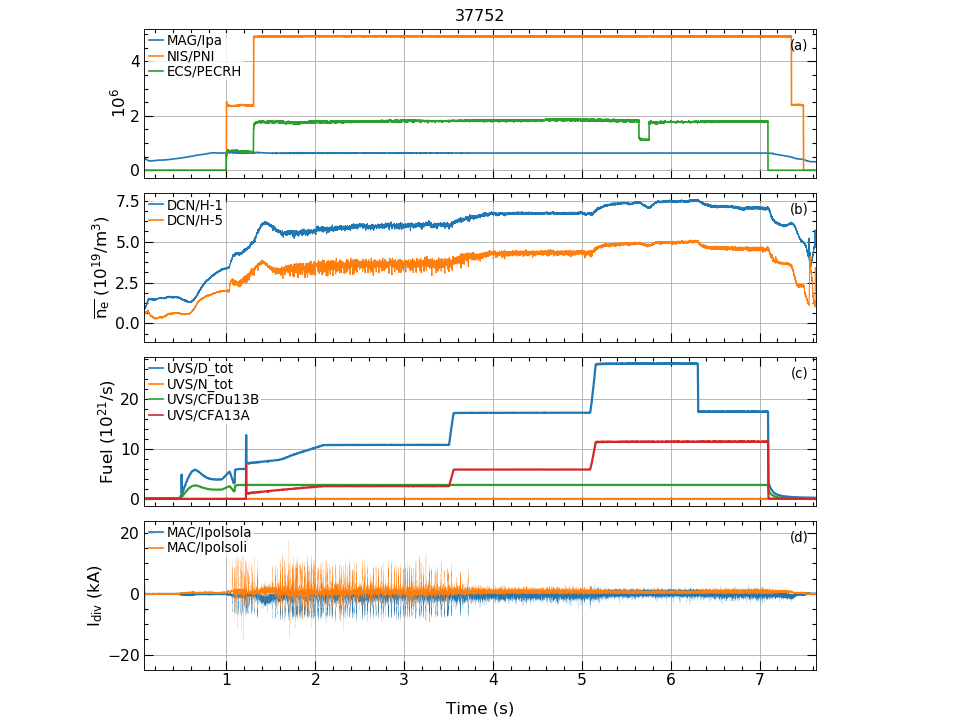

plot_signals({...}) took 0.30196 seconds


In [107]:
fig, axes, fig_name = plot_signals(
    times = data.times, signals = data.signals,
    diagnostics = signals['diagnostic'].tolist(),
    names=signals['name'].tolist(), 
    boxes=signals['box'].tolist(), 
    signal_multipliers=[1.0/x for x in signals['scale'].tolist()],
    y_labels=signals.sort_values(by='box')['y_label'].unique(),
    postfixes="overview", ncols=1,
    order='row',
    t_begins=t_begins, t_ends=t_ends,
    hspace = 0.1,
    title=str(shot),
    linewidths=signals['line_width'].tolist(),
)

fig.set_size_inches(*figure_size)

# Set proper limits and labels 
for index, row in signals.iterrows():
    axes[row['box']].set_ylim(row['y_min'] if valid(row['y_min']) else None,
                              row['y_max'] if valid(row['y_max']) else None)

**Run the cell bellow to save the figure.** File name is automatic. To customize the file name, replace `fig_name` with an apropriate name, e.g, `"my_figure"`

In [27]:
save_figure(fig, fig_name)

Figure saved to /afs/ipp-garching.mpg.de/home/d/danielhfc/phd-logbooks/logbooks/37765/0s000-10s000_overview.png
